In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split

In [2]:
data = pd.read_csv("./marziani.csv")
data.head()

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,viola,20.0,3.87,14.77,73.22
1,Robby,viola,27.0,3.15,28.19,88.44
2,Robby,viola,25.0,4.35,12.05,76.74
3,Robby,blu,20.0,3.76,9.90,81.37
4,Robby,blu,28.0,2.86,19.87,84.65


In [3]:
features = ["n_arti", "peso","altezza", "larghezza"]
target = ["specie"]

useful_data = data[features + target].dropna()

X = useful_data[features]
y = useful_data[target]

species_color = {"Robby": "red", "Simmys": "blue"}

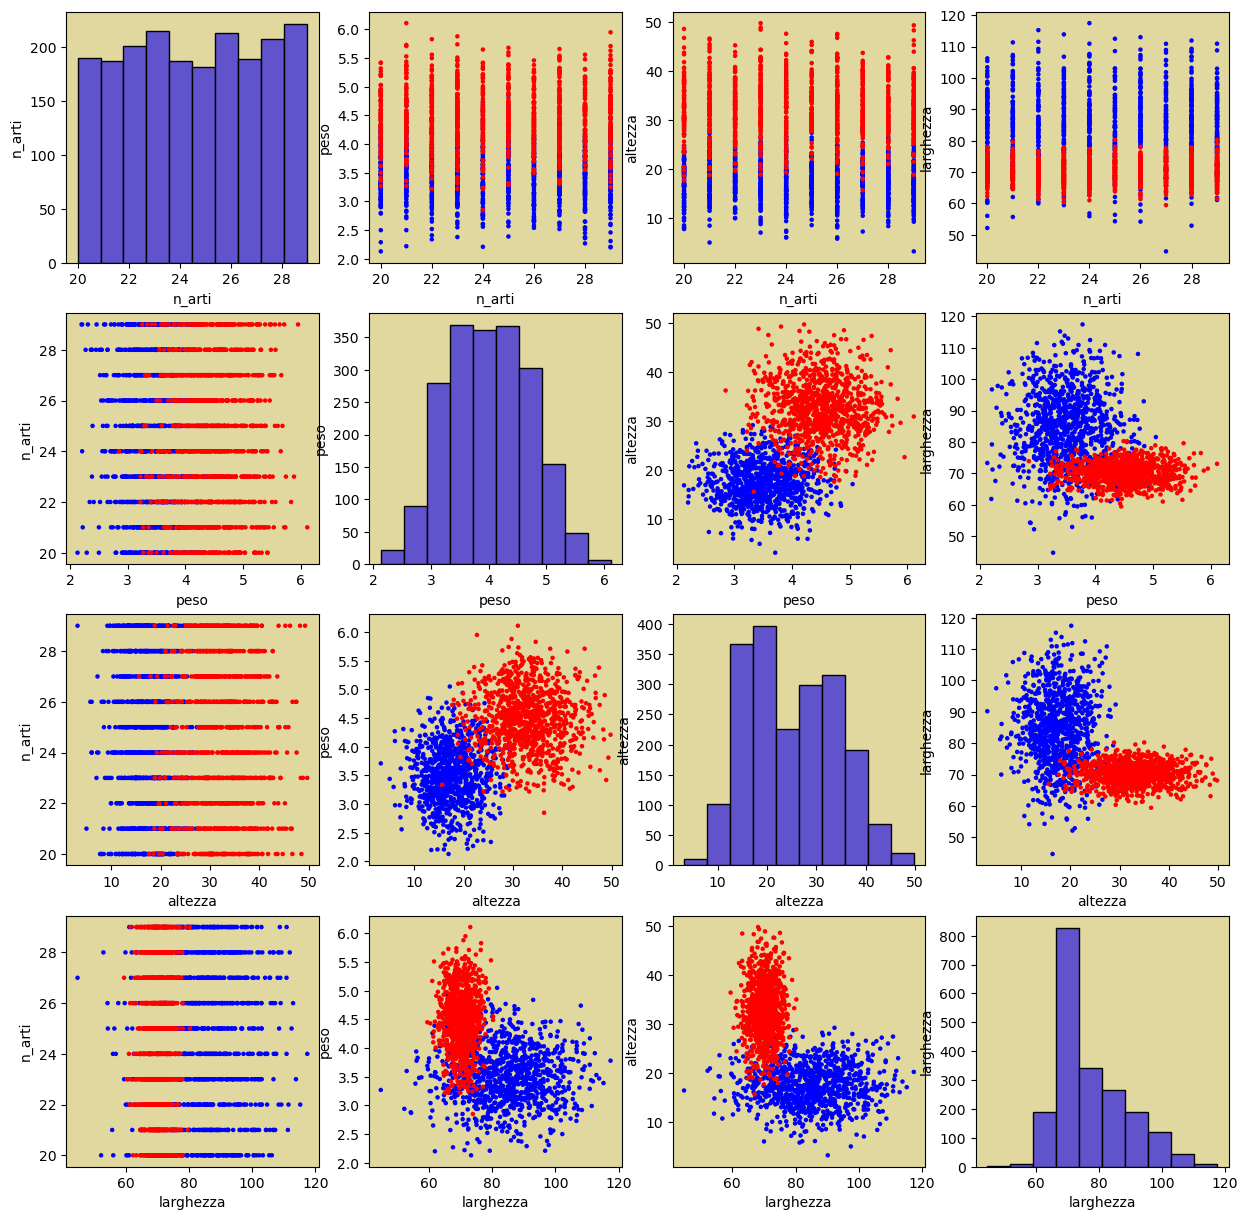

In [4]:
cols_marz = ["n_arti", "peso", "altezza", "larghezza"]
mrz = data["specie"].values
marz_colors = ["blue", "red"]
mrz_color = mrz.copy()
mrz_color[mrz_color == "Robby"] = marz_colors[0]
mrz_color[mrz_color == "Simmy"] = marz_colors[1]

fig, axs = plt.subplots(4,4, figsize=(15,15))

for i, icol in enumerate(cols_marz):
    for j, jcol in enumerate(cols_marz):
        if i!= j:
            x = data[icol].values
            y = data[jcol].values
            axs[i, j].scatter(x, y, s = 5, c = mrz_color)
            axs[i, j].set_xlabel(icol)
            axs[i, j].set_ylabel(jcol)
            axs[i, j].set_facecolor("#E1D89F")
        else:
            x = data[icol].values
            axs[i, j].hist(x, color = "#6153CC", edgecolor = "black")
            axs[i, j].set_xlabel(icol)
            axs[i, j].set_ylabel(jcol)
            axs[i, j].set_facecolor("#E1D89F")
            
plt.show()

In [5]:
colore_Encoder = LabelEncoder()
data["colore"] = colore_Encoder.fit_transform(data["colore"])
data

,specie,colore,n_arti,peso,altezza,larghezza
0,Robby,2,20.0,3.87,14.77,73.22
1,Robby,2,27.0,3.15,28.19,88.44
2,Robby,2,25.0,4.35,12.05,76.74
3,Robby,0,20.0,3.76,9.90,81.37
4,Robby,0,28.0,2.86,19.87,84.65
...,...,...,...,...,...,...
1995,Simmy,2,29.0,4.55,35.48,68.47
1996,Simmy,0,23.0,3.84,29.86,71.51
1997,Simmy,2,22.0,4.55,29.41,68.38
1998,Simmy,1,27.0,4.53,33.12,68.10


In [6]:
features = ["colore","n_arti", "peso","altezza", "larghezza"]
target = ["specie"]

useful_data = data[features + target].dropna()

X = useful_data[features].to_numpy()
y = useful_data[target]

In [7]:
feature_scaler = StandardScaler()
X_norm = feature_scaler.fit_transform(X) # qui stiamo operando su un DataFrame
X_norm

array([[ 1.21517805, -1.58603875, -0.17611753, -1.13447201, -0.38365309],
       [ 1.21517805,  0.8329531 , -1.19672132,  0.33783391,  0.98713702],
       [ 1.21517805,  0.14181257,  0.50428499, -1.43288275, -0.0666241 ],
       ...,
       [ 1.21517805, -0.89489822,  0.78778604,  0.4716799 , -0.81956795],
       [ 0.00183285,  0.8329531 ,  0.75943594,  0.87870338, -0.84478616],
       [ 1.21517805, -0.54932796,  1.56741393, -0.68356461, -1.12849108]])

In [8]:
target_encoder = LabelEncoder()
y_enc = target_encoder.fit_transform(y.to_numpy().reshape(-1, 1).ravel())
y_enc

array([0, 0, 0, ..., 1, 1, 1])

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X_norm, y_enc, test_size = 0.3, random_state = 123)

In [10]:
model = MLPClassifier(hidden_layer_sizes=(20,20,7), max_iter=2000, random_state= 987)

In [11]:
model.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 7), max_iter=2000, random_state=987)

In [12]:
# accuratezza sui dati di test
accuratezza  = model.score(X_test, y_test) * 100
print(f"Accuratezza: {accuratezza:.2f}%")

Accuratezza: 97.65%


In [13]:
marziano_test = [["rosso", 4, 10, 20, 5]]
marziano_test[0] = colore_Encoder.fit_transform(marziano_test[0])
specie_num = model.predict(feature_scaler.transform(marziano_test))
print(f"Il pinguino è un {target_encoder.inverse_transform(specie_num)[0]}")

Il pinguino è un Robby


## Salvare il modello

In [ ]:
import joblib
joblib.dump(model, "./marziano_model.joblib")
joblib.dump(feature_scaler, "./marziano_scaler.joblib")
joblib.dump(target_encoder, "./marziano_encoder.joblib")
joblib.dump(colore_Encoder, "./marziano_colore.joblib")


['./marziano_colore.joblib']